# Praca Domowa 4

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

## Zadanie 1a

In [8]:
df[(df.Publisher=="Nintendo")&(df.NA_Sales<df.EU_Sales)&(df.Year>2015)].reset_index()

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
1,6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
2,14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


## Zadanie 1b


In [48]:
df2 = df[df.Year==2010].groupby("Genre").Global_Sales.agg("sum").to_frame().reset_index()
df2[df2.Global_Sales==df2.Global_Sales.max()]

,Genre,Global_Sales
0,Action,117.64


## Zadanie 1c

In [47]:
import numpy as np
df3 = df.groupby("Genre",as_index=False)[["EU_Sales","JP_Sales"]].agg("mean")
df3 = df3[df3.EU_Sales<df3.JP_Sales].sort_values("JP_Sales",ascending=False)
df3 = df3.drop("EU_Sales",axis='columns')
df3.columns = ["Typ Gry","Średnia sprzedaż w Japonii"]
df3.reset_index().drop("index",axis='columns')

,Typ Gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


## Zadanie 2

### Wykres oryginalny

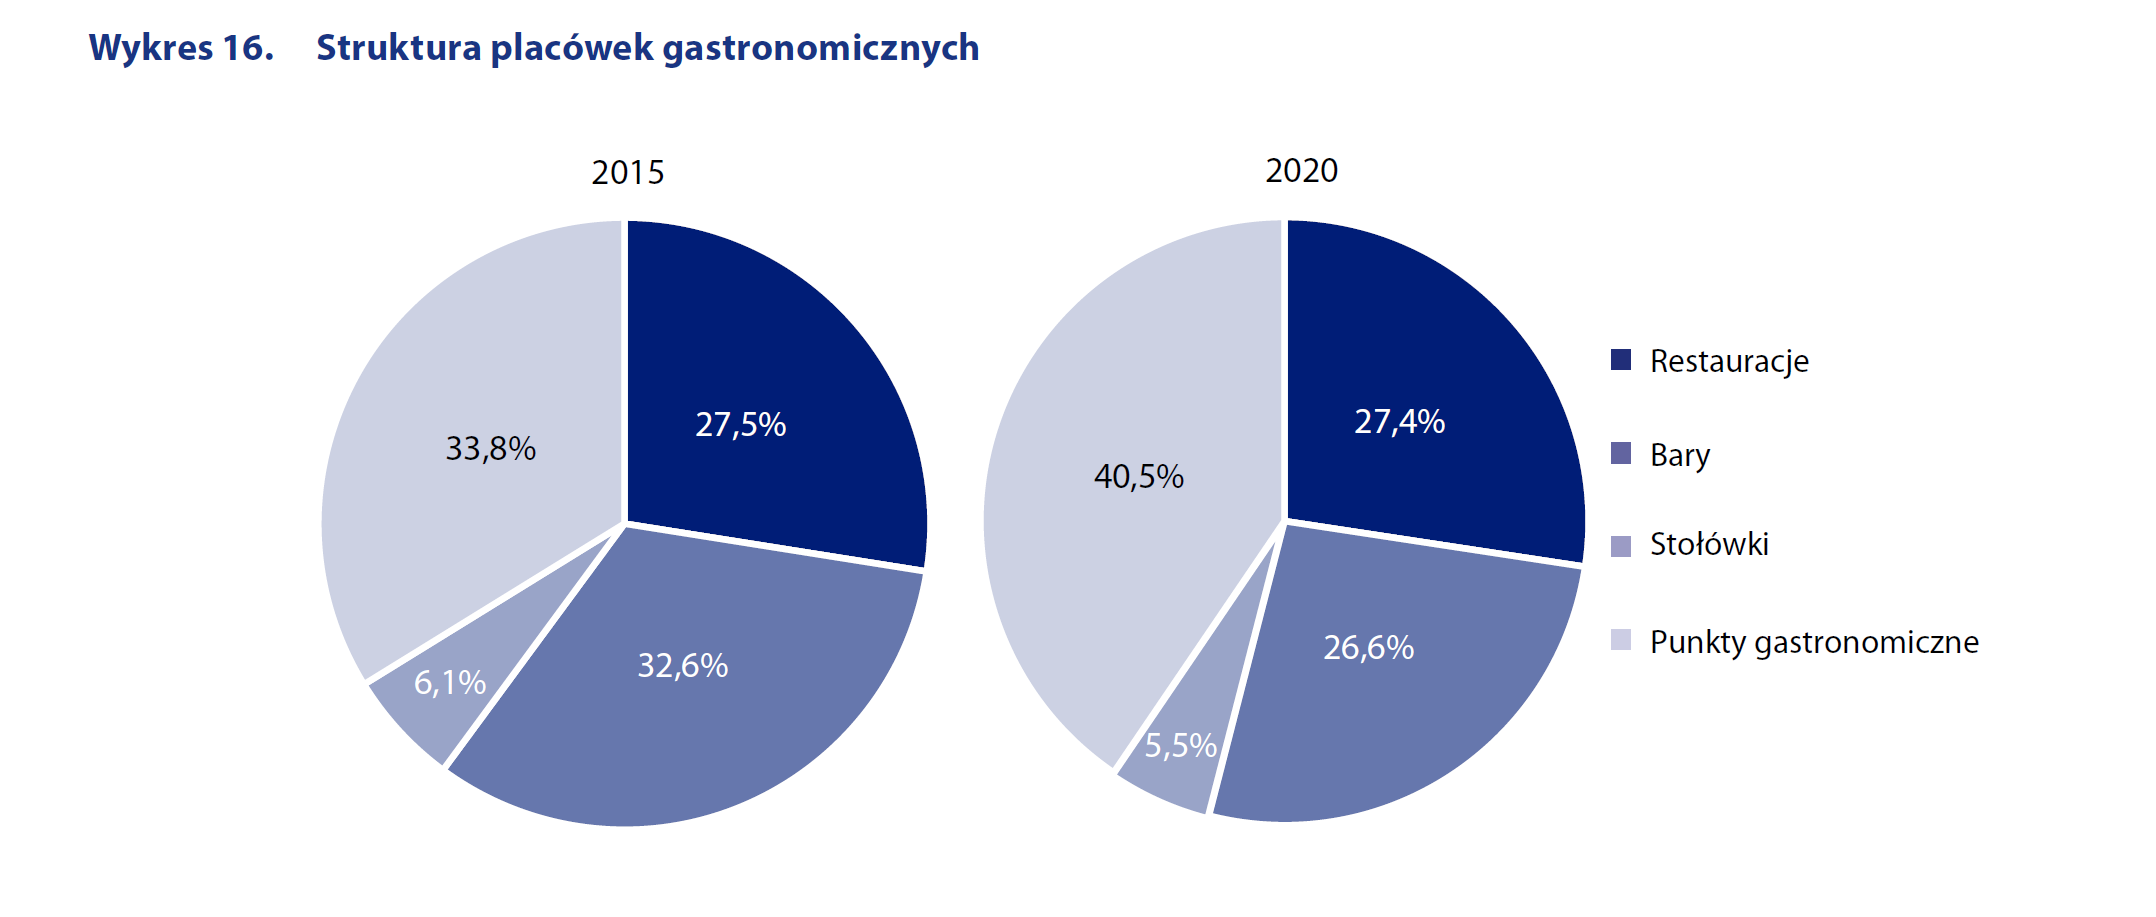

In [49]:
from IPython.display import Image
Image("C:/Users/wojtek/Desktop/pw/Techniki wizualizacji danych/Pd2/WykresGUS.png")

Źródło: 
[https://stat.gov.pl/obszary-tematyczne/ceny-handel/handel/rynek-wewnetrzny-w-2020-roku,7,27.html](https://stat.gov.pl/obszary-tematyczne/ceny-handel/handel/rynek-wewnetrzny-w-2020-roku,7,27.html)

Strona 32, wykres 16

### Wykres poprawiony w ggplot2

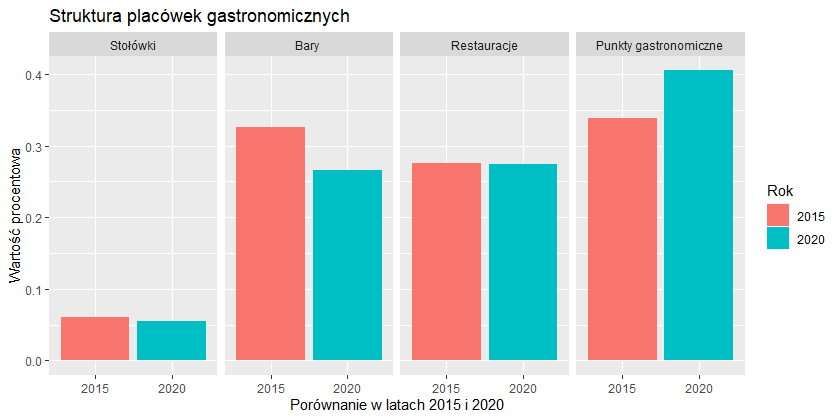

In [50]:
from IPython.display import Image
Image("C:/Users/wojtek/Desktop/pw/Techniki wizualizacji danych/Pd2/Wykres2.png")

### Wykres poprawiony w matplotlib

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

In [22]:
df = pd.read_csv(r"C:/Users/wojtek/Desktop/pw/Techniki wizualizacji danych/Pd4/dane1.csv",sep=';',encoding='latin-1')

In [23]:
df.iloc[:,1]=df.iloc[:,1]*100
df.iloc[:,2]=df.iloc[:,2]*100
df

,StrukturaPlacówekGospodarczych,X2015,X2020
0,Restauracje,27.5,27.4
1,Bary,32.6,26.6
2,Stolowki,6.1,5.5
3,PunktyGastronomiczne,33.8,40.5


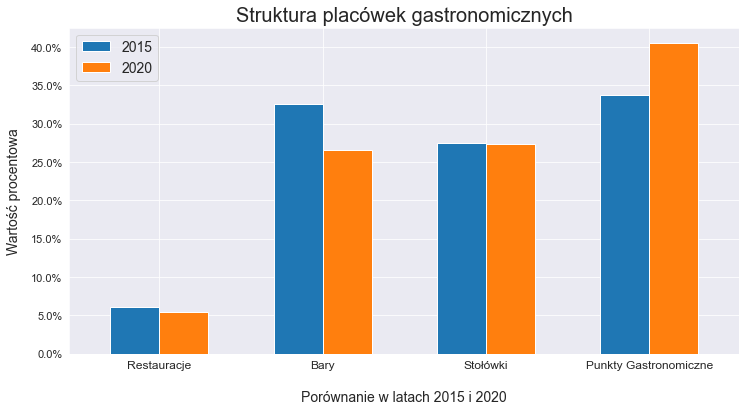

In [55]:
df.sort_values('X2020').plot.bar(width=0.6).yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.xticks([0,1,2,3],['Restauracje','Bary','Stołówki','Punkty Gastronomiczne'],rotation=0,size=12)
plt.yticks(size=11)

plt.legend(['2015','2020'],prop={'size': 14})

plt.ylabel("Wartość procentowa",size=14,labelpad=10)
plt.xlabel("Porównanie w latach 2015 i 2020",size=14,labelpad=20)
plt.title("Struktura placówek gastronomicznych",size=20)

plt.grid(visible=True)
plt.rcParams['figure.figsize'] = [12, 6]
sns.set_style("darkgrid")

### Dlaczego wykres w matplotlib jest lepszy?

Wykres stworzony w matplotlib jest dużo lepszy niż wykres oryginalny ze względu na formę. Wartości posortowane rosnąco w dwóch słupkach prezentują się dużo czytelniej niż wartości na dwóch oddzielnych wykresach kołowych. 

W porównaniu do wykresu w ggplot2, wykres w matplotlib jest bardziej dopracowany i jest w nim położona większa waga do detali. Na przykład, oś Y nie zostawia marginesu poniżej wartości 0, tak jak dzieje się to na wykresie z R. Dodatkowo, wartości na tejże osi są przedstawione w formie procentów ze znakiem %, a nie w formie ułamkowej. Oprócz tego, podpisy obydwu osi są w określonym marginesie od wartości na osi, natomiast w poprzednim wykresie teksty te zostały umiejscowione tuż obok siebie. Co więcej, poszczególne strktury placówek gastronomicznych na wykresie nie są już oddzielone białymi przestrzeniami, co zwiększa czytelność wykresu w Pythonie.